<a href="https://colab.research.google.com/github/diananovitasari/Factor-Affect-Student-Performance/blob/main/Factor_Affect_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/content/drive/MyDrive/Dataset/student_prediction.csv')
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
df['LIKES_DISCUSS']

0      1
1      3
2      1
3      2
4      2
      ..
140    2
141    2
142    2
143    2
144    3
Name: LIKES_DISCUSS, Length: 145, dtype: int64

In [ ]:
df[['CLASSROOM','GRADE']]

,CLASSROOM,GRADE
0,2,1
1,2,1
2,1,1
3,1,1
4,1,1
...,...,...
140,1,5
141,1,5
142,1,1
143,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
GENDER,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
HS_TYPE,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
SCHOLARSHIP,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
WORK,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
ACTIVITY,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
PARTNER,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
SALARY,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
TRANSPORT,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
LIVING,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df.drop(['GRADE','STUDENTID'],axis=1)
y= df['GRADE']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

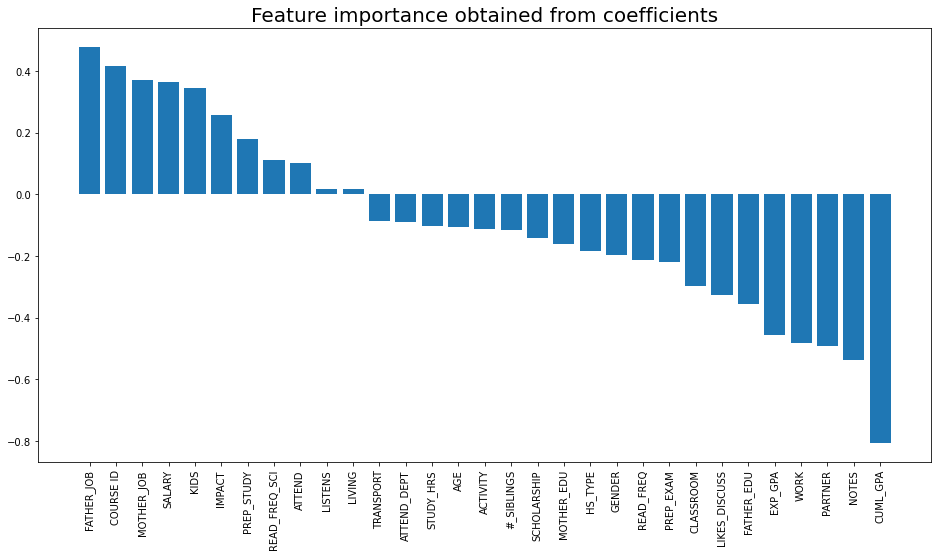

In [ ]:
importances= pd.DataFrame(data={'Attribute':X_train.columns,'Importance':model.coef_[0]})
importances= importances.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(16,8))
plt.bar(x=importances['Attribute'],height=importances['Importance'])
plt.title('Feature importance obtained from coefficients',size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
new_df=df[['MOTHER_JOB','FATHER_JOB','SALARY','KIDS','COURSE ID','IMPACT','GRADE']]

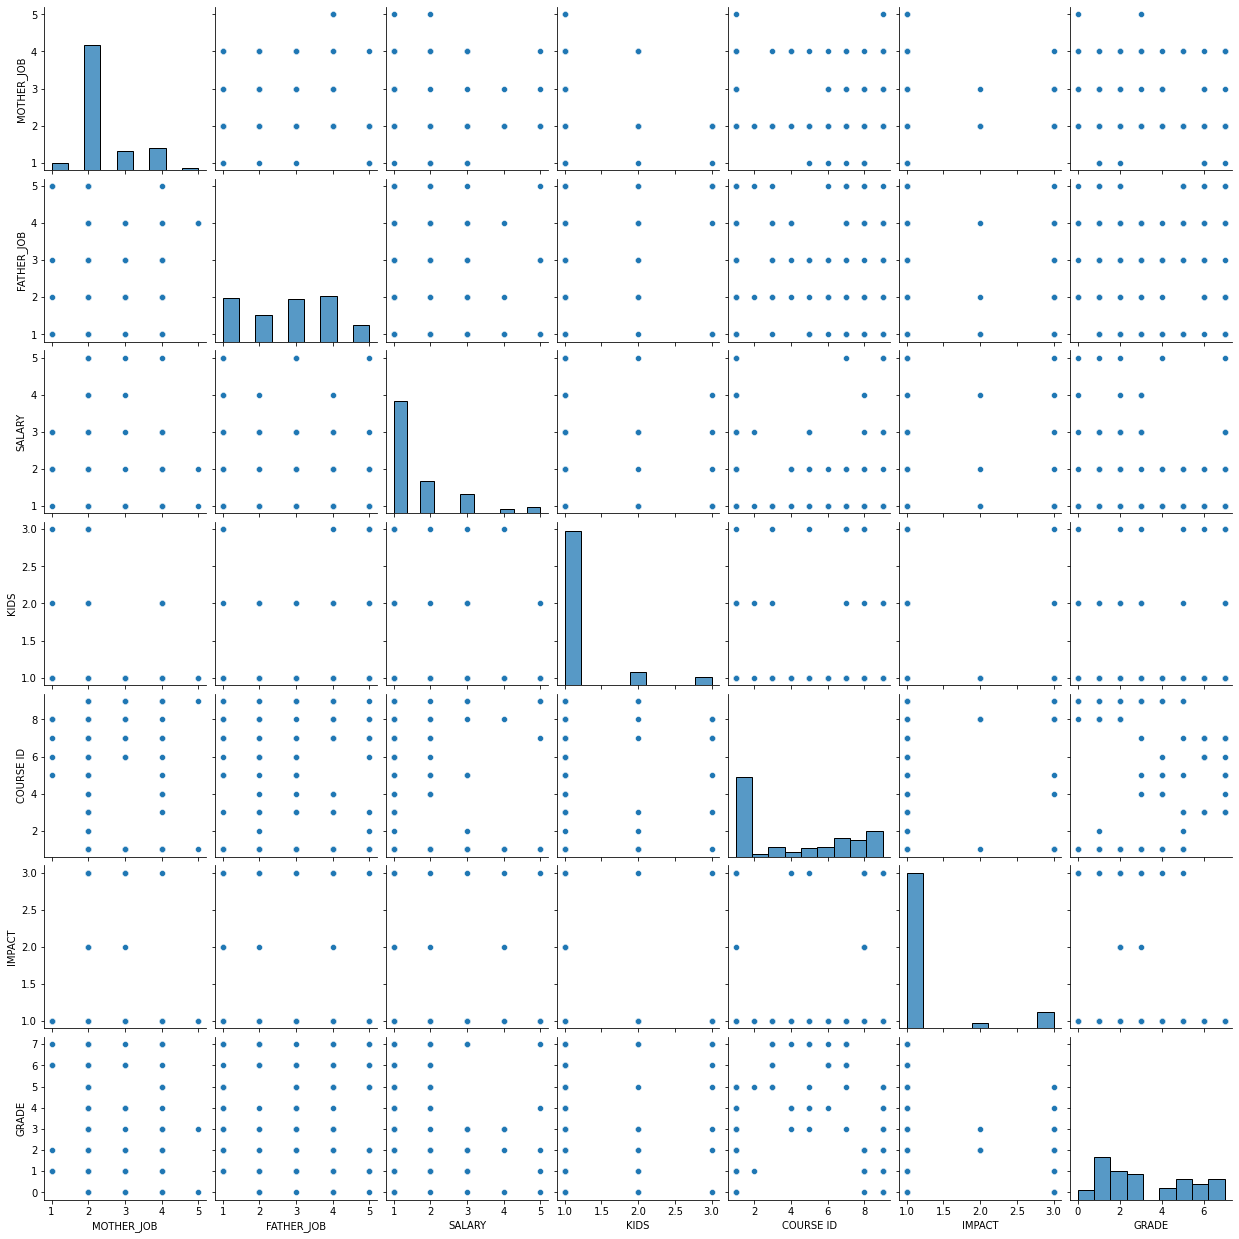

In [ ]:
sns.pairplot(new_df,hue_order=['GRADE','IMPACT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


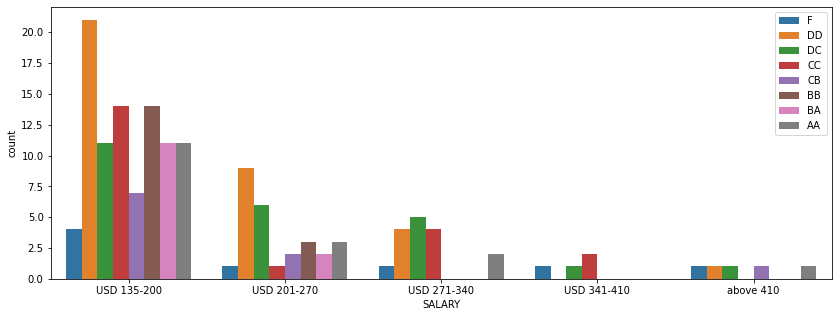

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(new_df['SALARY'],order=np.arange(1,6,1),hue=new_df['GRADE'])
plt.xticks(np.arange(0,5),['USD 135-200','USD 201-270','USD 271-340','USD 341-410','above 410']);
plt.legend(['F','DD','DC','CC','CB','BB','BA','AA'],loc=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


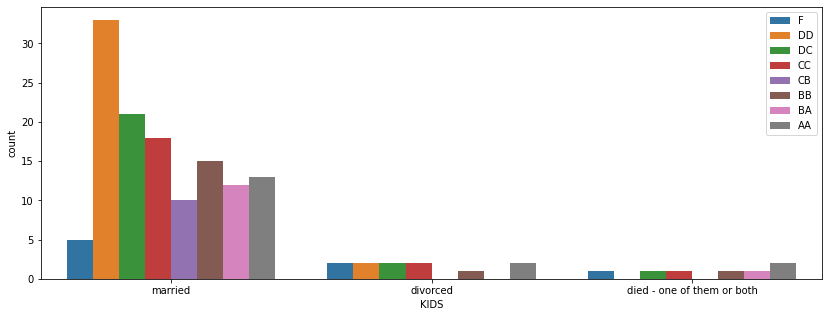

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(new_df['KIDS'],order=np.arange(1,4),hue=new_df['GRADE'])
plt.xticks(np.arange(0,3),['married','divorced','died - one of them or both']);
plt.legend(['F','DD','DC','CC','CB','BB','BA','AA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


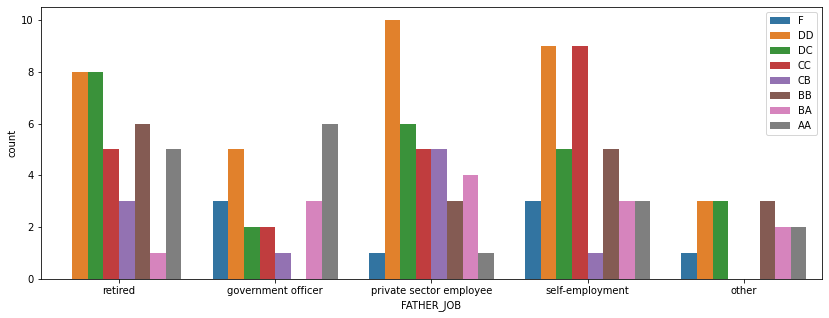

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(new_df['FATHER_JOB'],order=np.arange(1,6),hue=new_df['GRADE'])
plt.xticks(np.arange(0,5),['retired','government officer','private sector employee','self-employment','other']);
plt.legend(['F','DD','DC','CC','CB','BB','BA','AA'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


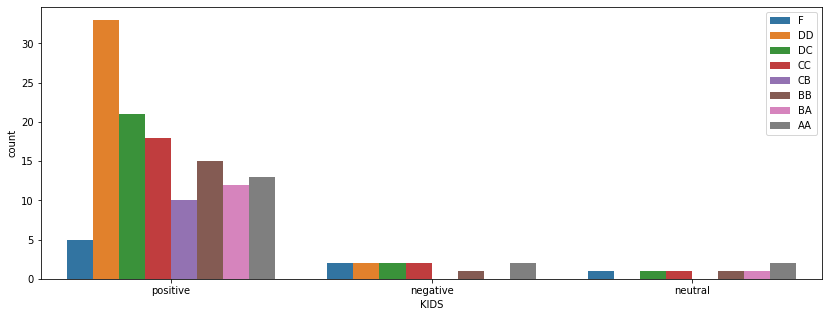

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(new_df['KIDS'],order=np.arange(1,4),hue=new_df['GRADE'])
plt.xticks(np.arange(0,3),['positive','negative','neutral']);
plt.legend(['F','DD','DC','CC','CB','BB','BA','AA'])